# Week 2 Activity: Building Sinusoids, Practicing Functions, Understanding Digital Audio
Complete this activity as part of your participation grade. Pending length of the lecture, you will have time in class to work. Everything you need to complete this activity can be found in this week's (or a previous week's) lecture code.

## Sinusoids

1) Create (and then plot) a sinusoid of 44Hz, with amplitude of 2, and a sample rate of 22,050 that lasts 2 seconds.

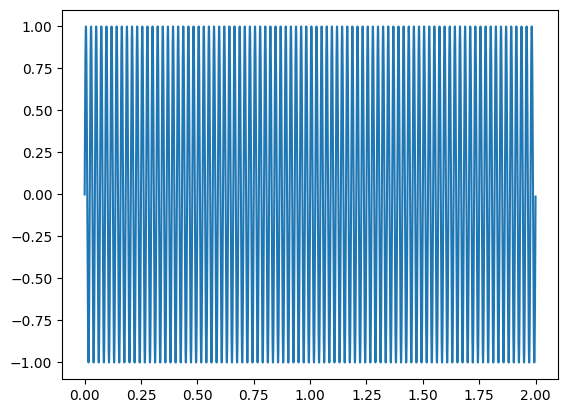

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from IPython.display import Audio
from scipy.io.wavfile import read

fs = 22050
f = 44
t = np.arange(0, 2, 1/fs)

x = np.sin(2*np.pi*f*t)
plt.plot(t, x)

2) Play back your sinusoid (SET VOLUME FIRST!)

In [5]:
Audio(x, rate=fs)

3) Change the plot (don't just zoom in) such that you see only the first 10 cycles. Change the x-axis of your plot to show milliseconds.

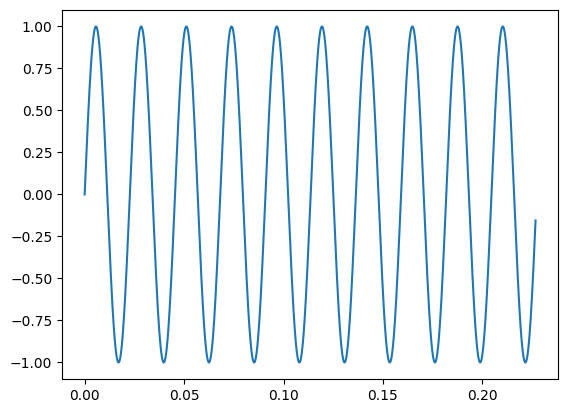

In [6]:
plt.plot(t[:5000], x[:5000])

4) Write a function called genSine() which returns a sinusoid given frequency, phase offset, amplitude, sampling rate, and duration in seconds(remember you can use default parameters where appropriate)

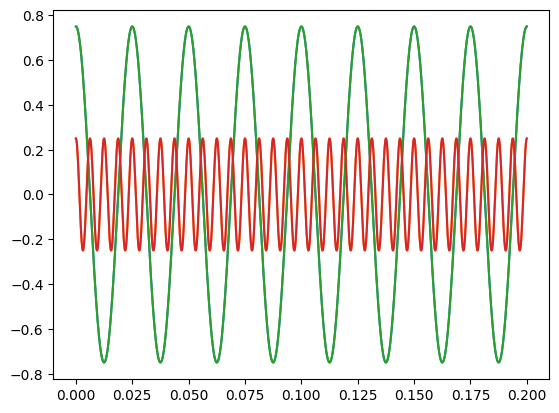

In [17]:
def genSine(frequency, phaseOffset, amplitude, sampleRate, durationSec):
    try:
        if amplitude <= 0:
            print('Amplitude cannot be 0')
            return(None)
        if (type(frequency) == int or type(frequency) == float) and (type(phaseOffset) == int or type(phaseOffset) == float) and (type(amplitude) == int or type(amplitude) == float) and (type(sampleRate) == int or type(sampleRate) == float) and (type(durationSec) == int or type(durationSec) == float):
            t = np.arange(0, durationSec, 1/sampleRate)
            x = amplitude * np.cos(2*np.pi*frequency*t+phaseOffset)
            plt.plot(t, x)
            return(t, x)
        else:
            raise InvalidInputError('Arguments must be of type int or float')
    except InvalidInputError as e:
        print(e)
        
    

t1, x1 = genSine(40, 0, .75, 44100, 0.2)
t2, x2 = genSine(160, 0, .25, 44100, 0.2)
plt.plot(t1, x1, t2, x2)


5. Plot 2 harmonic sinusoids with different amplitudes on top of each other using your function to generate the signals.

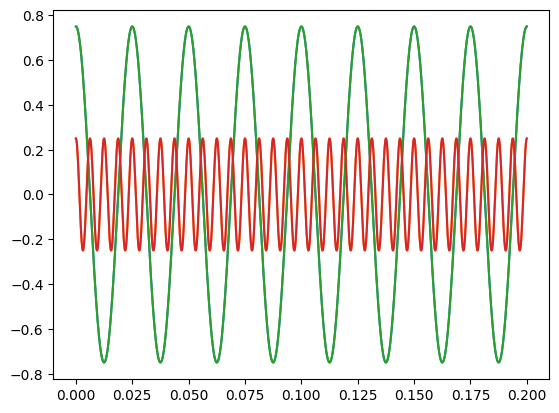

In [18]:
t1, x1 = genSine(40, 0, .75, 44100, 0.2)
t2, x2 = genSine(160, 0, .25, 44100, 0.2)
plt.plot(t1, x1, t2, x2)

## Digital Audio - Sampling

1) Using your genSine function, create a sinusoid within a comfortable range in Hz of human hearing. It should cover 2s of duration and have a reasonable sampling rate. Play it back (with LOW volume!!)

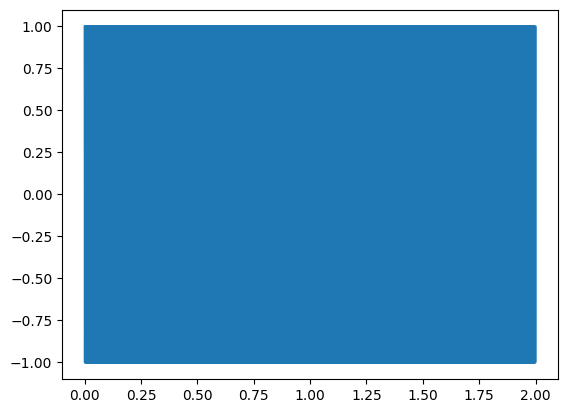

In [24]:
t3, x3 = genSine(440, 0, 1, 44100, 2)
Audio(x3, rate=44100)

2) What is the lowest sampling rate you can convert the sinusoid to and still hear the sound as a sinusoid at the appropriate pitch height? (Note: the `Audio` widget will not playback anything with a rate less than 3000 in Chrome and some other browsers - this can affect your mileage with this question!!)

3) Create a sinusoidal signal, $s$ with a fixed sampling rate of 10kHz.  Try to play back your sinusoid under differing conditions:

* change the frequency in Hz
* change the playback speed by altering the "rate" parameter in Audio

In doing this, try to examine for yourself the relation between the Nyquist frequency and aliasing. Make plots if it helps.

4) Create two scenarios where you obtain an aliased frequency of approximately 200Hz (that you can (hypothetically) hear).

5) Write a function to calculate aliased frequencies. Note: if sample rate is an even number, subtract 1 from sample rate first.

## Digital Audio - Bit depth

1) Find the file "sax-phrase-short.wav" in the "audio" folder. What is the data type of the numeric values?

2) Create a subset of the original signal from the 3000th to 4000th samples only. Plot it.

3) What is the bit depth of this audio clip?

*Hint: recall the data type*

4) How could you convert the bit resolution to 8-bit?

*Hint: look at the range of values for numpy data types in the table from Lesson 5*

5) Write a function to scale the audio to 8-bit Test it out and play it back.